In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/raw/geo-reviews-dataset-2023.csv")

df

,address,name_ru,rating,rubrics,text
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3.0,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.0,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1.0,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4.0,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5.0,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...
...,...,...,...,...,...
499995,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4.0,Железнодорожная станция,"Охрана кривая но добрая, двери не закрываются ..."
499996,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4.0,Железнодорожная станция,По сравнению со многими современными платформа...
499997,"Новосибирск, Коммунистическая улица, 48А",NaN,5.0,"Бар, паб","Приятная атмосфера, прекрасное вино, волшебная..."
499998,"Астраханская область, Харабалинский район",Сарай-Бату,5.0,Достопримечательность,Был с семьёй 13.06.23 Отличное место. Рекоменд...


In [18]:
sample = df.sample(1)
sample

,address,name_ru,rating,rubrics,text
79769,"Москва, Цветной бульвар, 23","Пироги, вино и гусь",5.0,Кафе;Ресторан,Приятное место с неординарными и вкусными блюд...


In [21]:
sample.to_dict()

{'address': {79769: 'Москва, Цветной бульвар, 23'},
 'name_ru': {79769: 'Пироги, вино и гусь'},
 'rating': {79769: 5.0},
 'rubrics': {79769: 'Кафе;Ресторан'},
 'text': {79769: 'Приятное место с неординарными и вкусными блюдами. Хочется вернуться в этот ресторан.\n'}}

In [22]:
df = pd.read_parquet("data/embedding_bench/normal_rubrics_15886_exploded.parquet")
df

,question,name_ru,address,rating,rubrics,text
0,Где поесть вкусную пиццу?,People’s Food,"Москва, Зеленоград, к100",5.0,Доставка еды и обедов;Пиццерия;Суши-бар,"Лучшая доставка👍быстро, вкусно, соотношение це..."
1,Где поесть вкусную пиццу?,People’s Food,"Москва, Зеленоград, к100",5.0,Доставка еды и обедов;Пиццерия;Суши-бар,Отличное место \nДружелюбный персонал\nХорошая...
2,Где поесть вкусную пиццу?,People’s Food,"Москва, Зеленоград, к100",5.0,Доставка еды и обедов;Пиццерия;Суши-бар,"Шикарная пицца, постоянно здесь заказываем, вс..."
3,Где поесть вкусную пиццу?,People’s Food,"Москва, Зеленоград, к100",5.0,Доставка еды и обедов;Пиццерия;Суши-бар,Всем доброго продуктивного дня!!Заказывю еду к...
4,Где поесть вкусную пиццу?,Big Rolls,"Пермь, Хабаровская улица, 56",5.0,Суши-бар;Пиццерия,"Шикарные роллы и очень вкусная пицца,всем оста..."
...,...,...,...,...,...,...
64116,Магазины с посудой и товарами для кухни,Всё для дома,"Москва, Свободный проспект, 33",5.0,Товары для дома;Магазин хозтоваров и бытовой х...,"Широкий ассортимент товаров на любой случай, м..."
64117,Магазины с посудой и товарами для кухни,Всё для дома,"Краснодарский край, Сочи, микрорайон Головинка...",5.0,Строительный магазин,Приятный и отзывчивый продавец. Довольно широк...
64118,Магазины с посудой и товарами для кухни,Всё для дома,"Московская область, Раменский городской округ,...",5.0,Магазин хозтоваров и бытовой химии,Хороший магазин в шаговой доступности. Всегда...
64119,Магазины с посудой и товарами для кухни,Посуда-центр,"Новосибирск, улица Мира, 61",5.0,Магазин посуды;Товары для дома,Были в том районе и решили зайти! Отличный маг...


In [37]:
sample = df[df["question"] == "Где поесть вкусную пиццу?"][["question", "name_ru", "text"]].sample(5)

In [38]:
sample

,question,name_ru,text
741,Где поесть вкусную пиццу?,ТОКИО-CITY,Само место мне понравилось. Но вот обслуживани...
1115,Где поесть вкусную пиццу?,Сицилия,Отличная семейная Пиццерия. Все отлично как и ...
18,Где поесть вкусную пиццу?,Суши Wok,"Очень приятно: всегда скидки, акции - очень ра..."
659,Где поесть вкусную пиццу?,ТОКИО-CITY,Нереально сидишь смотришь как малыши бесяться ...
650,Где поесть вкусную пиццу?,ТОКИО-CITY,в данный момент нахожусь в Токио Всеволожск. Р...


In [39]:
sample["text"].to_list()

['Само место мне понравилось. Но вот обслуживание хромает, причём на обе ноги. Мы бронировали столик заранее, когда пришли, нас проводили за наш стол и благополучно забыли на 20 минут. Даже меню не предложили. Пока мы уже сами администратора не подозвали, никто на нас внимания не обращал. Не скажу ,что была полная посадка. Нет, столики свободные были, а вот официантов -не было (((  Кода же официант приняла у нас заказ ( к официанту вообще претензий нет- улыбчивая и приятная девушка), началась вторая часть " марлизонского балета " . В нашем заказе было и блюдо из детского меню и вот его принесли через 2 часа!!!!! Когда весь остальной заказ через 45 минут. Возникает вопрос : как спокойно кушать родителям,когда годовалый малыш смотрит на тебя и не поймёт, почему его не кормят?\\nСнимаю за это две звезды. \n',
 'Отличная семейная Пиццерия. Все отлично как и во всей сети. Вкусные блюда приемлемые цены.\n',
 'Очень приятно: всегда скидки, акции - очень радуют! Всё оперативно, вкусно! Процвет

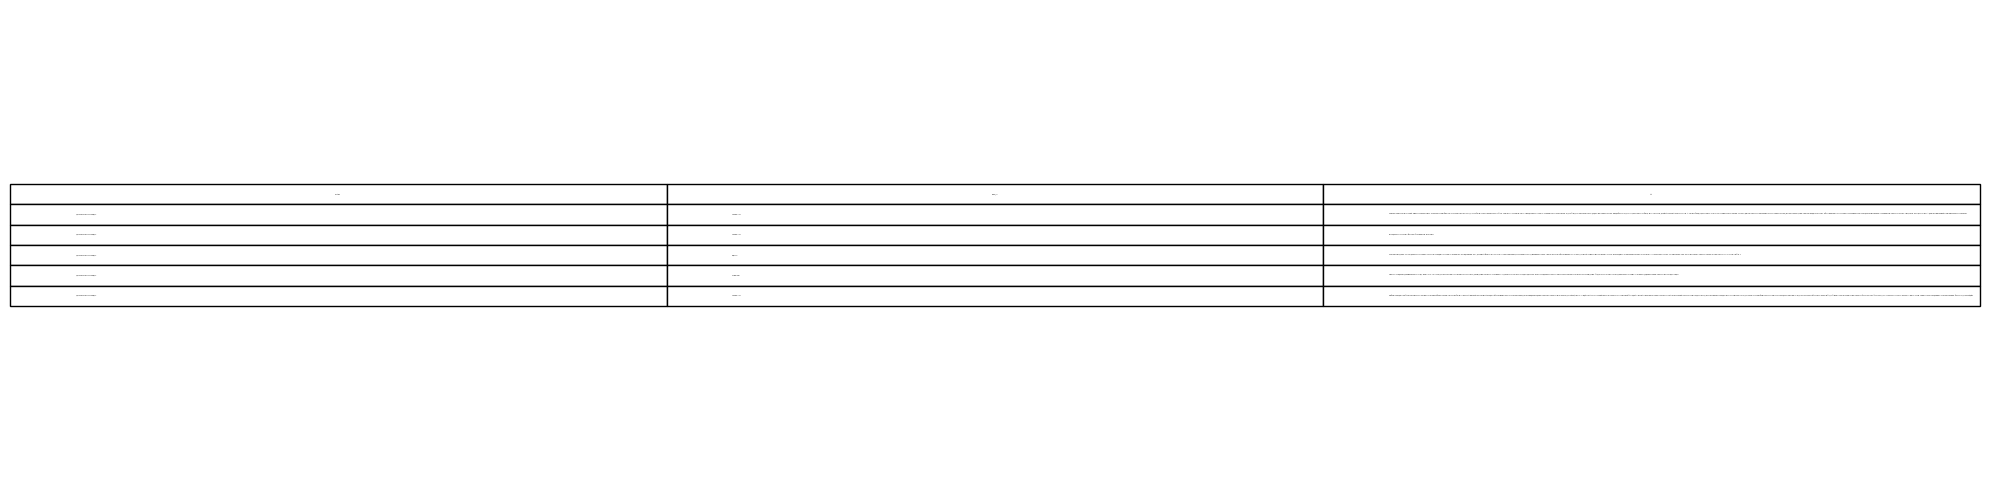

In [31]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.axis("off")
table = ax.table(cellText=sample.values, colLabels=sample.columns, loc="center", cellLoc="left")
plt.tight_layout()
plt.savefig("df_table.png", dpi=300)

In [1]:
df = pd.read_csv("data/prepared/prepared.csv")
df

,address,name_ru,rating,rubrics,text,region
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3.0,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...,Екатеринбург
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.0,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ...",Московская область
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1.0,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я...",Краснодар
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4.0,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...,Санкт-Петербург
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5.0,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...,Тверь
...,...,...,...,...,...,...
499024,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,5.0,Железнодорожная станция,Хороший способ избежать автобусной пытки. Элек...,Москва
499025,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4.0,Железнодорожная станция,"Охрана кривая но добрая, двери не закрываются ...",Москва
499026,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4.0,Железнодорожная станция,По сравнению со многими современными платформа...,Москва
499027,"Астраханская область, Харабалинский район",Сарай-Бату,5.0,Достопримечательность,Был с семьёй 13.06.23 Отличное место. Рекоменд...,Астраханская область
